Parcial I  


Parte asincrónica


Andrea Sofía Daza


202122293

 Un robot opera recogiendo y moviendo objetos sobre una superficie. El robot
consta de un motor para controlar la rotación del brazo (𝜃) y un motor que permite extender
o retraer el brazo telescópico (𝑙).


1a. A Encuentre las expresiones para describir la posición del efector del robot (P) en función del
movimiento del motor 𝜃 y de la longitud l.

In [81]:
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols
from sympy import symbols,sin,cos

r, l, theta,d = symbols('r,l,theta,d')
d = 0.75
P = (d+l)*sin(theta)+(d+l)*cos(theta)
P

(l + 0.75)*sin(theta) + (l + 0.75)*cos(theta)

1b. Encuentre la velocidad y aceleración total del punto P en el instante en que 𝜃=30deg,
𝜃̇ constante =10deg/s, 𝑙=0.5m, 𝑙
̇=0.2m/s y 𝑙=̈ -0.3m/s^2.

In [82]:
#Cargar librerías
import numpy as np
from sympy import symbols, Function, diff,sqrt

In [83]:
#Cálculo de la velocidad

ldotdot = Function('ldotdot')(theta)
ldot = Function('ldot')(theta)
thetadot = Function('thetadot')(theta)

theta = np.deg2rad(30) 
thetadot = np.deg2rad(10)
l = 0.5
ldot = 0.2
ldotdot = -0.3

v_radial = ldot
v_theta =  l *thetadot

v_total = sqrt(v_radial**2+v_theta**2)
v_total #m/s

0.218209613662340

In [84]:
#Cálculo de la aceleración

a_radial = ldotdot - l * thetadot**2
a_theta =  l * thetadot**2 +2*ldot*thetadot

a_total = sqrt(a_radial**2+a_theta**2)
a_total #m/s^2


0.326501134678058

2. El automóvil (A) tiene una velocidad de 50km/h y frena produciendo una
desaceleración constante de 3m/s2
. Determine la velocidad y aceleración del carro relativa a
un observador subido en la rueda de radio 9m que se mueve a 3rpm constantes cuando el
observador pasa por el punto B mostrado en la imagen (45°)

![Alt text](image-21.png)

In [85]:
from sympy import symbols, cos,sin 

#El marco de referencia fijo se toma la tierra
#Definir variables
v_A = 50/3.6 #velocidad en A
rev = 3 #rev/min de B
v_angular = rev*2*np.pi*(1/60) #pasar de rev/min a a rad/s
radio = 9.6
theta = 45

N = ReferenceFrame('N')
v_B,a_A = symbols('v_B,a_A')
v_A_vector= v_A*N.x
v_B = radio*v_angular
a_A_vector = a_A * N.x
a_A = 3.8 #aceleración en A
v_B_vector= v_B*cos(np.deg2rad(theta))*N.x - v_B*cos(np.deg2rad(theta))*N.y

#Fórmula para movimiento relativo
v_A_B_vector = v_A_vector-v_B_vector
v_A_B_vector #m/s


11.7563050785729*N.x + 2.13258381031602*N.y

In [86]:
#Calcular aceleración
a_B = radio*(rev*np.pi/30)**2 #m/s^2
a_B_vector = a_B*cos(np.deg2rad(theta))*N.x-a_B*sin(np.deg2rad(theta))*N.y
a_B_vector
a_A = 3.8 #aceleración en A
a_A_vector = a_A * N.x

#Fórmula de movimiento relativo
a_A_B_vector = a_A_vector-a_B_vector
a_A_B_vector #m/s^2


3.13002903683467*N.x + 0.669970963165332*N.y

3. El dispositivo de la figura funciona como un switch de contacto que se activa al
alcanzar una aceleración a suficientemente alta. El pasador A tiene una masa de 100mg y
en el diagrama se presenta su posición para una aceleración a=0

![Alt text](image-19.png)

In [78]:
from sympy import symbols, Eq, solve

# Definir variables simbólicas
k, y_i = symbols('k,y_i')

# Definir constantes 
m_A = 100 / 10**6  # mg a kg
g = 9.81  # m/s^2
a = 2 * g  
y = 0.25*0.0254

# Definir las ecuaciones
ecuacion_1 = Eq(k * y_i - m_A * g, 0)
ecuacion_2 = Eq(k * (y_i+y) - m_A * g , m_A*a)

# Resolver el sistema de ecuaciones
sol = solve((ecuacion_1, ecuacion_2), (k, y_i))

# Imprimir la solución
print(sol)


[(0.308976377952756, 0.00317500000000000)]


Un avión utiliza propulsión a través de las turbinas produciendo una fuerza
resultante T. Este avión tiene una resistencia del aire opuesta a su propulsión y
representada por el vector R. El avión está acelerando con un ángulo theta respecto a la
horizontal. Encuentre la propulsión neta (T-R) requerida para producir esta aceleración.
Formule la propulsión neta como una fracción del peso del avión. Es decir, encuentre la
expresión como fracción (T-R)/W.

![Alt text](image-22.png)

In [88]:
from sympy import symbols

T,R,theta,g,m,a = symbols('T,R,theta,g,m,a ')
P_neta = (a/g+cos(theta))
P_neta

a/g + cos(theta)

2a. Diseñe una trayectoria en términos de 𝜃 y 𝑙 que le permita recoger un objeto que está
quieto en la coordenada {x=2.5m, y=0} y dejarlo nuevamente en reposo sobre la
coordenada {x=0, y=1.0}.

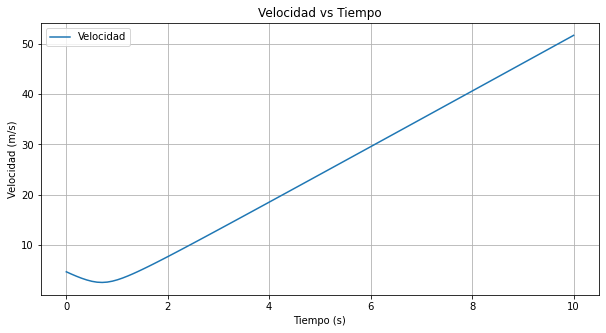

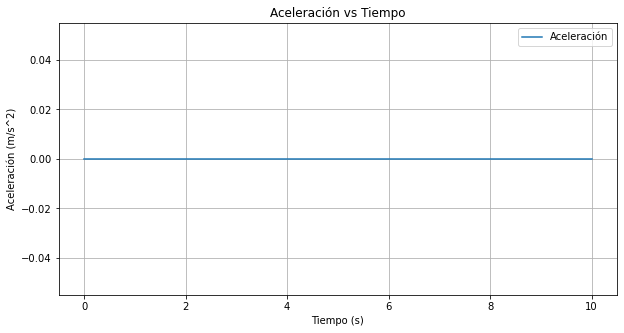

In [77]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Variables simbólicas
t = sp.symbols('t')

# theta(t) y l(t) de manera que cambien de manera lineal 
theta = (sp.pi / 2) * t
l = (2.5 - 2.5 * t) - 0.75  

# Derivadas de theta(t) y l(t) con respecto a t
dot_theta = sp.diff(theta, t)
dot_l = sp.diff(l, t)

# Componentes de la velocidad utilizando coordenadas polares
dot_r = sp.sqrt(dot_l**2 + l**2 * dot_theta**2)
v = sp.sqrt(dot_r**2 + (l * dot_theta)**2)

# Derivadas segundas
ddot_theta = sp.diff(dot_theta, t)
ddot_l = sp.diff(dot_l, t)

# Componentes de la aceleración en coordenadas polares
ddot_r = sp.sqrt(ddot_l**2 + l**2 * ddot_theta**2)
a = sp.sqrt(ddot_r**2 + (l * ddot_theta)**2)

# Tiempo
t_valores = np.linspace(0, 10, 100)

# Velocidad y aceleración en función del tiempo
v_valores = [v.subs(t, t_val).evalf() for t_val in t_valores]
a_valores = [a.subs(t, t_val).evalf() for t_val in t_valores]

# Velocidad vs tiempo
plt.figure(figsize=(10, 5))
plt.plot(t_valores, v_valores, label='Velocidad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad vs Tiempo')
plt.grid(True)
plt.legend()

# Aceleración vs tiempo
plt.figure(figsize=(10, 5))
plt.plot(t_valores, a_valores, label='Aceleración')
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (m/s^2)')
plt.title('Aceleración vs Tiempo')
plt.grid(True)
plt.legend()

plt.show()


3. (2 puntos) Usted requiere utilizar el mismo dispositivo de la sección 1 para detectar cuando
un vehículo con llantas 225/50R16 exceda la velocidad límite de 50km/h. Para esto decide
poner el dispositivo sobre el rin como se presenta en la siguiente figura.

3.A Explique si la constante k que diseñó en el parcial funcionaría para esta aplicación o
modifíquela para que así sea.

In [76]:
from sympy import symbols, Eq, solve

# Definir variables simbólicas
y_f = symbols('y_f')

# Definir valores numéricos
m_A = 100 / 1000000  # mg a kg
g = 9.81  # m/s^2
v = 50/3.6 # Pasar de km/h a m/s
r = 15*0.0254  # Pulgadas a metros
a_2 = v**2 / r  # m/s^2

# Definir la ecuación original
k = 0.308976377952756
ec1 = Eq(k * y_f - m_A * g, m_A * a_2)

# Resolver el sistema de ecuaciones
sol_y = solve(ec1, y_f)
print(sol_y)
if sol_y[0]>y:
    print("Se debe modificar el k")
else:
    print("El resorte funcionará para este caso")

k = m_A*(v**2/r)/y
print("El nuevo k será:",k,"N/m") #N/m


[0.167039453421595]
Se debe modificar el k
El nuevo k será: 7.973266975340536 N/m


3.B Suponga que, en la fabricación del resorte, este puede tener un ±10% de incertidumbre con el
95% de confiabilidad. Además, la masa del pasador podría tener hasta un ±5% de incertidumbre.
Encuentre la incertidumbre de la velocidad límite de activación.

In [75]:
import numpy as np
from sympy import symbols, sqrt, diff

# Definir variables simbólicas
k, m_A, g, = symbols('k m_A g')
r = 15*0.0254  # Pulgadas a metros
y = (0.25)*0.0254

# Definir la velocidad límite de activación como una expresión simbólica
v_limit = sqrt((r * y * k) / m_A)

# Calcular las derivadas parciales con respecto a k y m_A
partial_vk = diff(v_limit, k)
partial_mA = diff(v_limit, m_A)

# Definir las incertidumbres
delta_mA = 0.05 * m_A  # ±5% de incertidumbre en m_A
delta_k = 0.10 * k  # ±10% de incertidumbre en k

# Calcular la propagación de errores en v_limit debido a delta_k
delta_v_k = abs(partial_vk) * delta_k

# Calcular la propagación de errores en v_limit debido a delta_mA
delta_v_mA = abs(partial_mA) * delta_mA

# Calcular la incertidumbre total en v_limit
delta_v_total = sqrt(delta_v_k**2 + delta_v_mA**2)

delta_v_total
delta_v_total_numeric = delta_v_total.subs({m_A: 100/10**6, k:7.973266975340536 })

delta_v_total_numeric
# Imprimir la incertidumbre total en v_limit
print("Incertidumbre total en v_limit:", delta_v_total_numeric)



Incertidumbre total en v_limit: 0.776412492187427


Explique qué habilidades o conceptos ha adquirido en lo que lleva del curso y
cuál ejercicio o actividad le ha ayudado a desarrollar esto. Proponga un nuevo ejercicio que
le parezca interesante y que pudiera consolidar todos los temas del módulo de cinemática y
cinética de partículas.

A través del curso he podido adquirir más de una habilidad en distintas áreas. En primer lugar, llegamos a un punto en el cual unimos los conocimientos de cursos anteriores de cálculo y programación, por lo cual ha sido un desafío, al integrar conceptos que eran distantes a lo visto en las materias de la carrera, por lo cual he aprendido a aplicar los conceptos, fórmulas y demás elementos de otros cursos, en vez de limitarme a memorizarlas. Además, en lo transcurrido del curso he aprendido a llevar los problemas propuestos en clase a la vida real, lo cual ha ampliado mi capacidad de analizar y abordar de distinta manera un ejercicio. En particular, la actividad que quizás más dificultad me ha costado, precisamente porque no he podido lograr aplicar lo mencionado anteriormente, es el taller 1.3, en el cual se juntaron numerosos conceptos que elevaron el nivel de los ejercicios propuestos. 

Dicho esto, quisiera proponer el siguiente ejercicio que aborda tanto cinemática y cinética de partículas. Pepito está jugando tejo, y quiere saber con qué velocidad inicial debe arrojar la masa para que caiga en el punto marcado con una x. Se dan los datos señalados en el diagrama por medio de variables simbólicas. Adicionalmente, queremos saber cual será la velocidad relativa de A respecto a B, puesto que el amigo de Pepito está en el balcón viendolo jugar.


![Alt text](image-18.png)